## Integração numérica  


Assim como derivadas, integrais são absolutamente necessárias em todas as áreas da física. 
Vamos aprender nesse capítulo a estimar numericamente a integral de funções em uma dimensão. 

Em termos práticos a integral entre os pontos $x=a$ e $x=b$ de uma função $f(x)$ corresponde à area baixo a curva trazada por $f(x)$ entre esses dois limites. 

Nosso objetivo é calcular:

$$ I = \int_a^b f(x) dx $$

A integral pode ser feita somando quadrilateros embaixo da curva de $f(x)$,  por isso se
chama *quadratura numérica* mesmo quando o método é mais sofisticado. Segundo Riemman uma
integral é definida como:

$$
\int_a^b f(x) dx = \lim_{h \rightarrow 0} \left[ h \sum_{i=1}^{(b-a)/h} f(x) \right]
$$

A integração numérica é equivalente a soma finita de caixas de altura $f(x)$ e pesso $w_i$:

$$
\int_a^b f(x) dx \simeq  \sum_{i=1}^{N} f(x) w_i \;,  
$$

<img src="Figs/numerical_quadrature.jpeg" width=50% >

Note que $w_i$, a largura da caixa, não é necessáriamente igual em todos os pontos. Da escolha inteligente dessa largura dependem a **eficiência** e **precisão** dos métodos numéricos para integração numérica. 

Os algoritmos revisados a continuação consideram formas diferentes de escolher pontos e pessos. Estudaremos 2 métodos em detalhe,

* Regra do trapecio
* Regra de Simpson

e revisaremos o modulo `scipy.integrate` que alem desses dois métodos reune rotinas de integração numérica mais sofisticadas.

## Metodo do trapecio

A regra do trapecio usa os valores de $f(x)$ em $N$ pontos de $x$ igualmente
espaçados por uma distancia $h$. Logo

$$
h = \frac{b-a}{N-1} \;,  \;\; x_i = a + (i-1)h \;, \;\; i = 1, ..., N\; ,
$$

o método constroi uma linha reta entre cada intervalo de $i's$ e usa a altura média como o valor de $f$

$$
\int_{x_i}^{x_i+h} f(x) dx = h \frac{f_i + f_{i+1}}{2} 
$$

<img src="Figs/trapecio.png" width=50% >

Assim para o intervalo total

$$
\int_{a}^{b} f(x) dx = \frac{h}{2} f_1 + h f_2 + ... + h f_{N-1} + \frac{h}{2} f_N
$$

Logo: $w_i =\left[ h/2, h, ..., h, h/2 \right] $


## Método de Simpson

Para cada intervalo, a regra de Simpson aproxima $f(x)$ nao por uma
reta senao por uma parabola:  $f(x) \simeq \alpha x^2 + \beta x + \gamma$.


<img src="Figs/simpson.png" width=50% >

a área embaixo da parabola para cada intervalo é
$$
\int_{x_i}^{x_i+h} f(x) dx = \left[ \frac{\alpha x^3}{3} + \frac{\beta x^2}{2} + \gamma x \right]_{x_i}^{x_i+h}
$$

Se esse intervalo fosse $[-1,1]$, 

$$
\int_{-1}^{1} \alpha x^2 + \beta x + \gamma  dx =  \frac{2 \alpha}{3} + 2 \gamma 
$$

Mas:
$$
f(-1) = \alpha -\beta + \gamma \;, \; f(0) = \gamma  
$$


$$
f(1) = \alpha + \beta+ \gamma
$$


$$
\alpha = \frac{f(1) + f(-1)}{2} - f(0) \;, \;\; \beta = \frac{f(1) - f(-1)}{2}  \;, \;\; \gamma = f(0) 
$$


$$
\int_{-1}^{1} \alpha x^2 + \beta x + \gamma  dx  = \frac{f(-1)}{3} + \frac{4f(0)}{3} + \frac{f(1)}{3}
$$

Três valores de $f$ são necessarios para evaluar a integral nesse intervalo.
Generalizando:

$$
\int_{x_i-h}^{x_i+h} f(x)  dx  = \int_{x_i}^{x_i+h} f(x)  dx + \int_{x_i-h}^{x_i} f(x)  dx  
        \simeq \frac{h f_{i-1}}{3} + \frac{4 h f_{i}}{3} + \frac{h f_{i+1}}{3}  
$$

A regra de Simpson requer integração sob pares de intervalos, logo *um numero par
de intervalos é necessario*, ou $N$ impar. Somando as contribuições de todos os pares de intervalos:


$$
\int_{a}^{b} f(x) dx = \frac{h}{3} f_1 +  \frac{4h}{3} f_2 +  \frac{2h}{3} f_3 + \frac{4h}{3} f_4 +
         ... + \frac{4h}{3} f_{N-1} + \frac{h}{3} f_N
$$

## Erro na integração numérica

**A ideia é obter uma regra de integração que de uma resposta precisa com o
menor numero de pontos, $N$**. O erro algorítmico e o erro relativo podem ser
estimados expandindo $f(x)$ em serie de Taylor arredor do ponto médio do intervalo
de integração, e multiplicamos pelo número de intervalos.  Isto leva a:

$$
{\cal E}_t = {\cal O} \left( \frac{|b-a|^3 }{N^2}  \right) f^{(2)} \;, \; 
{\cal E}_S = {\cal O} \left( \frac{|b-a|^5 }{N^4}  \right) f^{(4)} \;, \;
\epsilon = \frac{{\cal E}_{t,s}}{f} 
$$

Aumentar a complexidade da integração leva a um erro que decresce com
o inverso de $N$ elevado a uma potencia cada vez maior. Porem, o erro é tambem
proporcional a derivadas de alta ordem de $f$. Por tanto para intervalos pequenos
e funções $f$ com derivadas `bem comportadas`,  a regra de Simpson deve
convergir mais rapido que  a regra do trapecio.

Para estimar o erro, assumimos que o erro de `round-off` é randômico e tem a forma:

$$
\epsilon_{ro} = \sqrt{N} \epsilon_m \;, \; \epsilon_m \sim 10^{-7} \; {\rm (single)} 
                                      \;, 10^{-15} \; \; {\rm (double)} \;, 
$$

como vimos, $\epsilon_m$ é a precisão da máquina. Como no capítulo anterior, Queremos encontrar o $N$ que minimiza o erro total: 

$$
\epsilon_{tot} \simeq \epsilon_{ro} + \epsilon_{t,S} \;.
$$

Isto acontece quando os dois são da mesma ordem. Vamos assumir que são iguais:

$$
\epsilon_{ro} = \epsilon_{t,S} =  \frac{{\cal E}_{t,S}}{f}  \;.
$$

Também assumimos que $f^{(n)}/f \simeq 1$, e $(b-a) = 1$. Então teremos para a **regra do trapecio** temos:

$$
\sqrt{N} \epsilon_t = \frac{f^{(2)} (b-a)^3}{f N^2} = \frac{1}{N^2}
$$

$$
N \simeq \frac{1}{\epsilon_t^{2/5}} = 10^6 \;, \; \epsilon_{ro} \simeq \sqrt{N} \epsilon_t = 5 \times 10^{-12}
$$

Já para o **método de Simpson** :

$$
\sqrt{N} \epsilon_S = \frac{f^{(4)} (b-a)^5}{f N^4} = \frac{1}{N^4}
$$

$$
N \simeq \frac{1}{\epsilon_S^{2/9}} = 2154 \;,
$$ 

$$
\epsilon_{ro} \simeq \sqrt{N} \epsilon_S = 5 \times 10^{-14}
$$ 

Em resumo temos

* A regra de Simpson é melhor que a regra do trapecio.

* É possível atingir a precisão da máquina na integral com a regra de Simpson
(e com algoritmos de ordem maior)

* A melhor approximação numérica não é atingida fazendo $N \rightarrow \infty$,
mas com um valor relativamente pequeno, $N \le 1000$.





In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

In [2]:
def trapezio(a, b, N):
    '''Função que realiza a integração pelo método do trapézio.'''
    x = np.linspace(a,b,N)
    h = x[1]-x[0]
    integral = h*0.5*(f(x[0]) + f(x[-1]))
    for xi in x[1:-1]:
        integral += h*f(xi)
    return integral

def simpson(a, b, N):
    '''Função que realiza a integração pelo método de Simpson.'''
    x = np.linspace(a,b,N)
    h = x[1]-x[0]
    integral = h/3*(f(x[0]) + f(x[-1]))
    fac = 4.
    for xi in x[1:-1]:
        integral += fac/3*h*f(xi)
        fac = (2. if fac == 4. else 4.)
    return integral

In [3]:
##### Definindo f(x) = e^(-x)
def f(x):
    return np.exp(-x)

In [4]:
# Integrando de 0 a 1 pelos métodos implementados acima
a = 0.
b = 1.
N = 99
trap = trapezio(a,b,N)
simp = simpson(a,b,N)
print ('Integração pelo método do trapézio:', trap, 'com N =', N)
print ('Integração pelo método de Simpson:', simp, 'com N =', N)

Integração pelo método do trapézio: 0.6321260436913043 com N = 99
Integração pelo método de Simpson: 0.6321205588666303 com N = 99


In [5]:
ex_int = 1. - 1./np.e
ex_int

0.6321205588285577

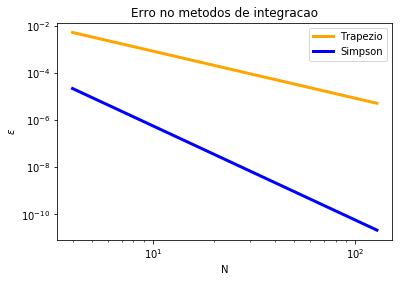

In [6]:
Nvec = [2**i for i in range(2,8)]
F_exata = 1. - 1./np.e
erro_trap = [abs((trapezio(a, b, n+1)-F_exata)/F_exata) for n in Nvec]
erro_simp = [abs((simpson(a, b, n+1) -F_exata)/F_exata) for n in Nvec]

plt.loglog(Nvec, erro_trap,lw=3, color='orange', label='Trapezio')
plt.loglog(Nvec, erro_simp,lw=3, color='blue', label='Simpson')
plt.xlabel('N')
plt.ylabel(r'$\epsilon$')
plt.title("Erro no metodos de integracao")
plt.legend()
plt.show()

## Scipy Integrate
### (scipy.integrate)

Provee várias rotinas de integração numérica com diferentes métodos. Para usar devemos importar o modulo scipy, ou diretamente o sub-modulo scipy.integrate


In [8]:
import scipy.integrate as integrate
x = np.linspace(0.,1.,50)
def f(x):
    return 4./(1.+x**2)

In [9]:
dx = x[1] - x[0]
print('método do trapezio:', integrate.trapz(f(x),dx=dx))
print('método de Simpson):', integrate.simps(f(x),dx=dx))
print('método Quadratura Gauss):', integrate.fixed_quad(f,0,1.,n=20))

método do trapezio: 3.1415232380686264
método de Simpson): 3.1415905296540054
método Quadratura Gauss): (3.1415926535897927, None)


In [10]:
np.pi

3.141592653589793

O método da quadratura Gaussiana é um dos mais eficientes para calcular integrais numéricas

In [13]:
def f(x):
    return np.exp(-x)

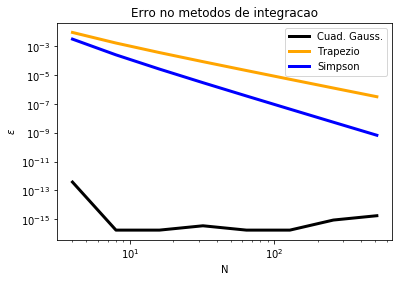

In [14]:
e1 = []
e2 = []
e3 = []
nv = []
F_exata = 1. - 1./np.e
for i in range (2,10):
    Nvec = 2**i
    x = np.linspace(0.,1.,Nvec)
    dx = x[1]-x[0]
    fx = f(x)
    nv.append(Nvec)
    e1.append(abs((integrate.trapz(fx,dx=dx)-F_exata)/F_exata))
    e2.append(abs((integrate.simps(fx,dx=dx)-F_exata)/F_exata))
    quad = integrate.fixed_quad(f,a=0.,b=1.,n=Nvec+1)
    e3.append(abs(quad[0]-F_exata)/F_exata)
    
plt.loglog(nv, e3,lw=3, color='k',   label='Cuad. Gauss.')
plt.loglog(nv, e1,lw=3, color='orange', label='Trapezio')
plt.loglog(nv, e2,lw=3, color='blue',   label='Simpson')
plt.xlabel('N')
plt.ylabel(r'$\epsilon$')
plt.title("Erro no metodos de integracao")

plt.title("Erro no metodos de integracao")
plt.legend()
plt.show()

In [16]:
integrate.cumtrapz?

In [20]:
x = np.linspace(0,2.*np.pi,64)
y = np.sin(x)

In [43]:
iy = integrate.cumtrapz(y,x,initial=0)

In [44]:
iy.shape

(64,)

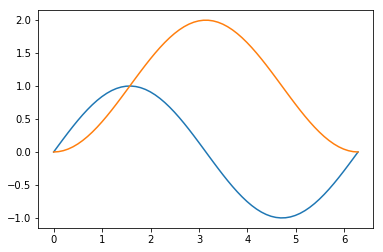

In [45]:
plt.plot(x,y)
plt.plot(x,iy)

In [46]:
integrate.cumtrapz?